In [10]:
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Task 1 : Benchmarking on Test Functions

In [38]:
def rosenbrock(x):
    """ Rosenbrock function """
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

def rastrigin(x):
    """ Rastrigin function """
    x = np.array(x)  # Ensure x is a numpy array
    d = len(x)  # Compute dimension internally
    return 10 * d + sum(x**2 - 10 * np.cos(2 * np.pi * x))

def ackley(x):
    """ Ackley function """
    x = np.array(x)  # Ensure x is a numpy array
    d = len(x)  # Compute dimension internally
    return -20 * np.exp(-0.2 * np.sqrt(sum(x**2) / d)) - np.exp(sum(np.cos(2 * np.pi * x)) / d) + 20 + np.exp(1)

def print_results(name, result):
    if "(CMA-ES)" in name: # Check if the result is a tuple (CMA-ES)
        best_x, best_f, iterations = result
        print(f"\n=== {name} Function Optimization ===")
        print(f"Optimal Solution: {best_x}")
        print(f"Function Value at Optimum: {best_f}")
        print(f"Number of Iterations: {iterations}")
    else:  
        print(f"\n=== {name} Function Optimization ===")
        print(f"Optimal Solution: {result.x}")
        print(f"Function Value at Optimum: {result.fun}")
        print(f"Number of Iterations: {result.nit}")

In [39]:
# === Define Bounds and Initial Guesses ===
bounds_rosenbrock = np.array([[-5, 5], [-5, 5]])
bounds_rastrigin = np.array([[-6, 6]]*2)
bounds_ackley = np.array([[-32, 32]]*2)

x0_rosenbrock = np.array([0, 0])  # Initial guess for Rosenbrock
x0_rastrigin = np.random.uniform(-5.12, 5.12,2)  # Initial guess for Rastrigin
x0_ackley = np.random.uniform(-32, 32,2)  # Initial guess for Ackley

In [40]:
rosenbrock_res = []
rastrigin_res = []
ackley_res = []

#### True solution

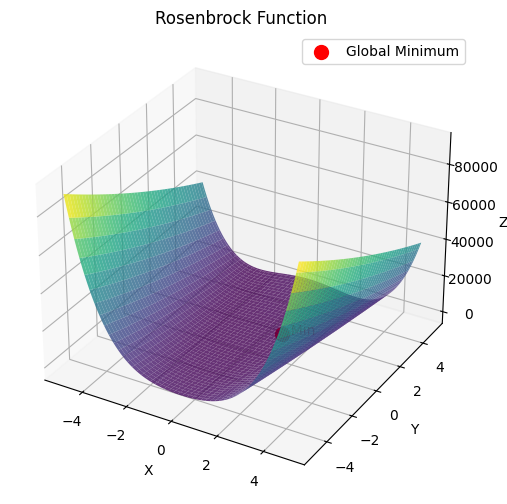

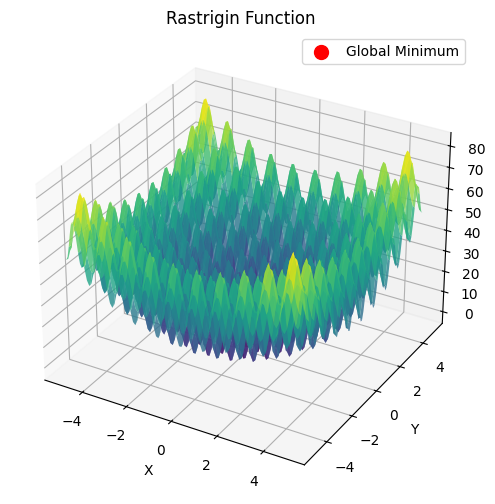

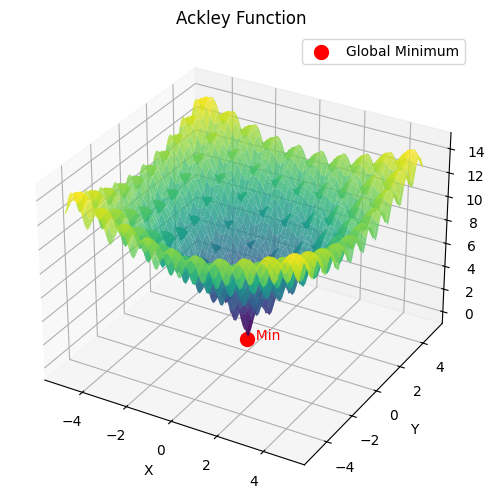

In [41]:
def plot_function(f, title, minima):
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.array([f([X[i, j], Y[i, j]]) for i in range(X.shape[0]) for j in range(X.shape[1])]).reshape(X.shape)
    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
    
    # Plot and label minima
    min_x, min_y = minima
    min_z = f([min_x, min_y])
    ax.scatter(min_x, min_y, min_z, color='red', s=100, label='Global Minimum')
    ax.text(min_x, min_y, min_z, '  Min', color='red')
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    ax.legend()
    plt.show()

plot_function(rosenbrock, 'Rosenbrock Function', (1, 1))
plot_function(rastrigin, 'Rastrigin Function', (0, 0))
plot_function(ackley, 'Ackley Function', (0, 0))

#### Nelder-Mead (Simplex Method)

In [42]:
from scipy.optimize import minimize

# add time tracking

import time

res_rosenbrock = minimize(rosenbrock, x0_rosenbrock, method='Nelder-Mead')
res_rastrigin = minimize(rastrigin, x0_rastrigin, method='Nelder-Mead')
res_ackley = minimize(ackley, x0_ackley, method='Nelder-Mead')
end_time_rosenbrock = time.time()

rosenbrock_res.append(res_rosenbrock)
rastrigin_res.append(res_rastrigin)
ackley_res.append(res_ackley)


print_results("Rosenbrock (Nelder-Mead)", res_rosenbrock)
print_results("Rastrigin (Nelder-Mead)", res_rastrigin)
print_results("Ackley (Nelder-Mead)", res_ackley)


=== Rosenbrock (Nelder-Mead) Function Optimization ===
Optimal Solution: [1.00000439 1.00001064]
Function Value at Optimum: 3.6861769151759075e-10
Number of Iterations: 79

=== Rastrigin (Nelder-Mead) Function Optimization ===
Optimal Solution: [-3.97979757  0.99497775]
Function Value at Optimum: 16.914202958981022
Number of Iterations: 32

=== Ackley (Nelder-Mead) Function Optimization ===
Optimal Solution: [ 30.99977458 -18.99986013]
Function Value at Optimum: 19.883075916124
Number of Iterations: 31


#### Simulated Annealing

In [22]:
from scipy.optimize import dual_annealing

res_rosenbrock = dual_annealing(rosenbrock, bounds_rosenbrock)
res_rastrigin = dual_annealing(rastrigin, bounds_rastrigin)
res_ackley = dual_annealing(ackley, bounds_ackley)

rosenbrock_res.append(res_rosenbrock)
rastrigin_res.append(res_rastrigin)
ackley_res.append(res_ackley)


print_results("Rosenbrock (Simulated Annealing)", res_rosenbrock)
print_results("Rastrigin (Simulated Annealing)", res_rastrigin)
print_results("Ackley (Simulated Annealing)", res_ackley)


=== Rosenbrock (Simulated Annealing) Function Optimization ===
Optimal Solution: [0.999997 0.999994]
Function Value at Optimum: 9.000633747731241e-12
Number of Iterations: 1000

=== Rastrigin (Simulated Annealing) Function Optimization ===
Optimal Solution: [-2.66353592e-09 -5.22913580e-09]
Function Value at Optimum: 7.105427357601002e-15
Number of Iterations: 1000

=== Ackley (Simulated Annealing) Function Optimization ===
Optimal Solution: [-5.20667091e-09 -4.38285215e-09]
Function Value at Optimum: 1.9249690286216037e-08
Number of Iterations: 1000


### CMA-ES

In [23]:
from cmaes import CMA

def optimize_cmaes(func, bounds, init_sigma=1.0, max_iters=1000):
    dim = len(bounds)
    mean = np.random.uniform(bounds[:, 0], bounds[:, 1])  # Random initial guess
    optimizer = CMA(mean=mean, sigma=init_sigma, bounds=bounds, n_max_resampling=10)

    best_x, best_f = None, float("inf")
    for generation in range(max_iters):
        solutions = []
        for _ in range(optimizer.population_size):
            x = optimizer.ask()
            value = func(x)
            solutions.append((x, value))
            if value < best_f:
                best_x, best_f = x, value
        
        optimizer.tell(solutions)
        if optimizer.should_stop():
            break

    return best_x, best_f, generation

best_x_rosenbrock , best_f_rosenbrock, gen_rosenbrock = optimize_cmaes(rosenbrock, bounds_rosenbrock)
best_x_rastrigin, best_f_rastrigin, gen_rastrigin = optimize_cmaes(rastrigin, bounds_rastrigin)
best_x_ackley, best_f_ackley, gen_ackley = optimize_cmaes(ackley, bounds_ackley)

rosenbrock_res.append((best_x_rosenbrock, best_f_rosenbrock, gen_rosenbrock))
rastrigin_res.append((best_x_rastrigin, best_f_rastrigin, gen_rastrigin))
ackley_res.append((best_x_ackley, best_f_ackley, gen_ackley))

print_results("Rosenbrock (CMA-ES)", (best_x_rosenbrock, best_f_rosenbrock, gen_rosenbrock))
print_results("Rastrigin (CMA-ES)", (best_x_rastrigin, best_f_rastrigin, gen_rastrigin))
print_results("Ackley (CMA-ES)", (best_x_ackley, best_f_ackley, gen_ackley))


=== Rosenbrock (CMA-ES) Function Optimization ===
Optimal Solution: [1. 1.]
Function Value at Optimum: 3.914876834825639e-18
Number of Iterations: 137

=== Rastrigin (CMA-ES) Function Optimization ===
Optimal Solution: [-0.99495863  0.99495864]
Function Value at Optimum: 1.9899181141865796
Number of Iterations: 113

=== Ackley (CMA-ES) Function Optimization ===
Optimal Solution: [ 3.99821802 17.98450994]
Function Value at Optimum: 18.529167701231426
Number of Iterations: 148


### Task 2: Hyperparameter Tuning in Machine Learning (2 marks)

In [43]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import time
import os
import random
from tqdm import tqdm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.metrics import accuracy_score

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import differential_evolution
from skopt import gp_minimize
from skopt.space import Real, Categorical
from skopt.utils import use_named_args
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

retrain = True

if os.path.exists('X_train.npy') and os.path.exists('y_train.npy') and os.path.exists('X_test.npy') and os.path.exists('y_test.npy') and not retrain:
    X_train = np.load('X_train.npy')
    y_train = np.load('y_train.npy')
    X_test = np.load('X_test.npy')
    y_test = np.load('y_test.npy')
else:
        
    # Load MNIST dataset
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
    dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

    # Flatten images and normalize
    X = dataset.data.numpy().reshape(len(dataset), -1) / 255.0
    y = dataset.targets.numpy()

    # Reduce dataset using stratified sampling (e.g., take 5% of the data)
    X_reduced, _, y_reduced, _ = train_test_split(X, y, test_size=0.995, stratify=y, random_state=42)

    # Split reduced dataset into train and test (e.g., 80-20 split)
    X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_reduced, test_size=0.2, stratify=y_reduced, random_state=42)
    X_train , X_val , y_train , y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

    # Save reduced dataset
    np.save('X_train.npy', X_train)
    np.save('y_train.npy', y_train)
    np.save('X_test.npy', X_test)
    np.save('y_test.npy', y_test)
    np.save('X_val.npy', X_val)
    np.save('y_val.npy', y_val)

    # Standardize data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    X_val = scaler.transform(X_val)


print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)
print('X_val shape:', X_val.shape)
print('y_val shape:', y_val.shape)

X_train shape: (192, 784)
y_train shape: (192,)
X_test shape: (60, 784)
y_test shape: (60,)
X_val shape: (48, 784)
y_val shape: (48,)


In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, dual_annealing
from skopt import gp_minimize
from skopt.space import Real, Categorical
from skopt.utils import use_named_args
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tqdm import tqdm

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm
from scipy.optimize import minimize, dual_annealing
from skopt import gp_minimize
from skopt.space import Categorical, Real
from skopt.utils import use_named_args
from sklearn.svm import SVC

# Define kernel choices
KERNEL_CHOICES = ["linear", "poly", "rbf"]

# Optimization histories
nm_history, da_history, cma_history = [], [], []
kernel_history = {kernel: [] for kernel in KERNEL_CHOICES}
param_history = []  # Stores C and gamma values per iteration


# Objective function: minimize (1 - accuracy)
def objective(params):
    kernel_idx = int(round(params[0]))
    kernel = KERNEL_CHOICES[kernel_idx]
    C = 10 ** params[1]
    gamma = 10 ** params[2] if kernel in ["rbf", "poly"] else "scale"
    
    model = SVC(kernel=kernel, C=C, gamma=gamma, random_state=42)
    model.fit(X_train, y_train)
    accuracy = model.score(X_val, y_val)
    kernel_history[kernel].append((params, 1 - accuracy))
    param_history.append((C, gamma))

    return 1 - accuracy

In [46]:
def nelder_mead_optimization():
    pbar = tqdm(desc="Nelder-Mead", unit="iter")
    
    def callback(xk):
        nm_history.append((xk.copy(), objective(xk)))
        pbar.update(1)
    
    result = minimize(objective, x0=[0, 0, 0], method="Nelder-Mead", callback=callback)
    pbar.close()
    return result

# Run optimizations
result_nm = nelder_mead_optimization()
print("\n=== Nelder-Mead Optimization ===")
print(f"Optimal Parameters: {result_nm.x}")
print(f"Function Value at Optimum: {result_nm.fun}")
print(f"Number of Iterations: {result_nm.nit}")
print(f"Best Accuracy: {1 - result_nm.fun:.4f}")

Nelder-Mead: 3iter [00:00,  8.98iter/s]


=== Nelder-Mead Optimization ===
Optimal Parameters: [0. 0. 0.]
Function Value at Optimum: 0.20833333333333337
Number of Iterations: 3
Best Accuracy: 0.7917


In [ ]:
# Dual Annealing Optimization
def dual_annealing_optimization():
    bounds = [(0, 2), (-2, 2), (-5, 1)]
    pbar = tqdm(desc="Dual Annealing", unit="iter")
    
    def callback(x, f, context):
        da_history.append((x.copy(), f))
        pbar.update(1)
    
    result = dual_annealing(objective, bounds, callback=callback)
    pbar.close()
    return result


result_da = dual_annealing_optimization()
print("\n=== Dual Annealing Optimization ===")
print(f"Optimal Parameters: {result_da.x}")
print(f"Function Value at Optimum: {result_da.fun}")
print(f"Number of Iterations: {result_da.nit}")
print(f"Best Accuracy: {1 - result_da.fun:.4f}")

In [ ]:
import cma

# CMA-ES Optimization
def cma_es_optimization():
    bounds = [[0, -2, -5], [2, 2, 1]]  # Bounds for kernel_idx, log_C, log_gamma
    x0, sigma = [1, 0, 0], 0.5  # Initial mean and step size
    es = cma.CMAEvolutionStrategy(x0, sigma, {'bounds': bounds, 'popsize': 10})
    pbar = tqdm(total=30, desc="CMA-ES Optimization", unit="iter")
    
    for _ in range(30):
        solutions = es.ask()
        es.tell(solutions, [objective(s) for s in solutions])
        cma_history.append((solutions, es.result.fbest))
        pbar.update(1)
    
    pbar.close()
    return es.result

result_cma = cma_es_optimization()
print("\n=== CMA-ES Optimization ===")
opt_params = result_cma.xbest
opt_params[0] = int(np.round(opt_params[0]))
print(f"Optimal Parameters: {opt_params}")
print(f"Function Value at Optimum: {result_cma.fbest}")
print(f"Best Accuracy: {1 - result_cma.fbest:.4f}")

(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 3 (seed=471148, Sun Mar 30 23:18:24 2025)


CMA-ES Optimization: 100%|██████████| 30/30 [00:05<00:00,  5.24iter/s]


=== CMA-ES Optimization ===
Optimal Parameters: [ 0.          0.36782199 -0.3724931 ]
Function Value at Optimum: 0.20833333333333337
Best Accuracy: 0.7917


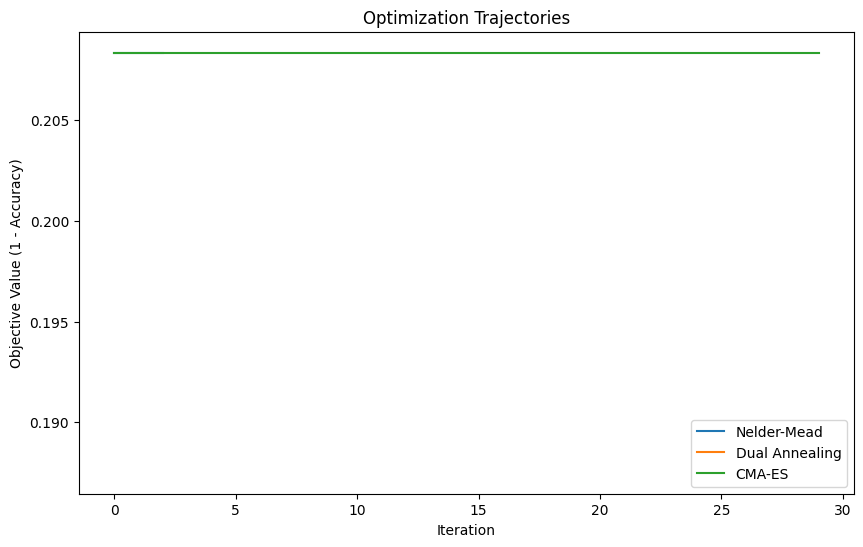

In [ ]:
# Performance Analysis and Visualization
def plot_optimization_trajectories():
    plt.figure(figsize=(10, 6))
    plt.plot([val[1] for val in nm_history], label='Nelder-Mead')
    plt.plot([val[1] for val in da_history], label='Dual Annealing')
    plt.plot([val[1] for val in cma_history], label='CMA-ES')
    plt.xlabel('Iteration')
    plt.ylabel('Objective Value (1 - Accuracy)')
    plt.title('Optimization Trajectories')
    plt.legend()
    plt.show()

plot_optimization_trajectories()

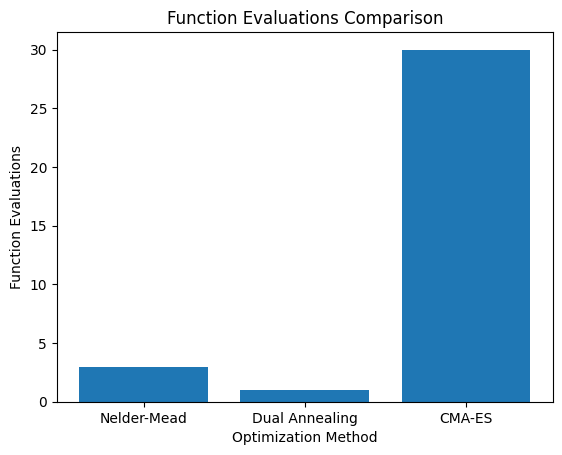

In [ ]:
def compare_function_evaluations():
    evals = [len(nm_history), len(da_history), len(cma_history)]
    labels = ['Nelder-Mead', 'Dual Annealing', 'CMA-ES']
    plt.bar(labels, evals)
    plt.xlabel('Optimization Method')
    plt.ylabel('Function Evaluations')
    plt.title('Function Evaluations Comparison')
    plt.show()

compare_function_evaluations()

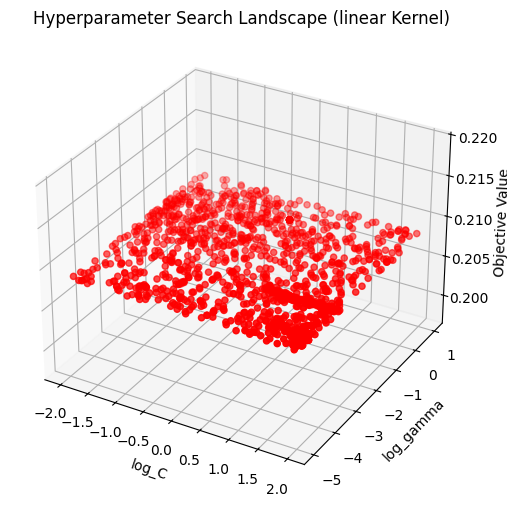

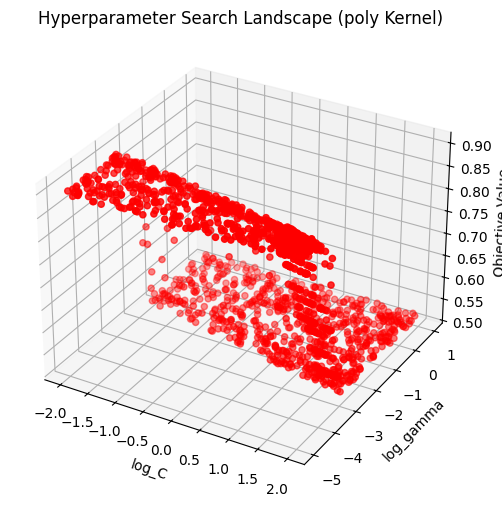

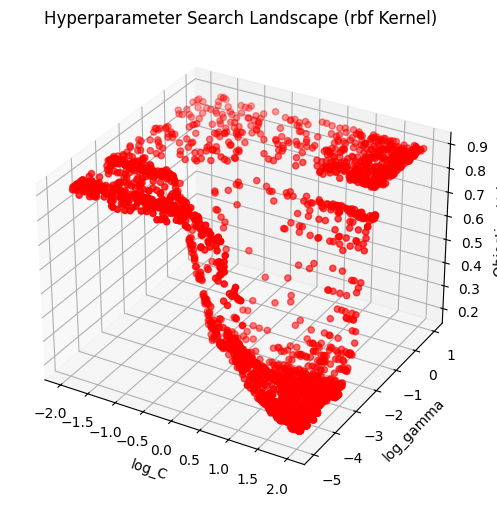

In [ ]:
def visualize_search_landscape():
    for kernel in KERNEL_CHOICES:
        fig = plt.figure(figsize=(12, 6))
        ax = fig.add_subplot(111, projection='3d')
        
        x_vals = [x[0][1] for x in kernel_history[kernel]]  # log_C
        y_vals = [x[0][2] for x in kernel_history[kernel]]  # log_gamma
        z_vals = [x[1] for x in kernel_history[kernel]]  # Objective values
        
        ax.scatter(x_vals, y_vals, z_vals, c='r', marker='o')
        ax.set_xlabel('log_C')
        ax.set_ylabel('log_gamma')
        ax.set_zlabel('Objective Value')
        ax.set_title(f'Hyperparameter Search Landscape ({kernel} Kernel)')
        plt.show()

visualize_search_landscape()


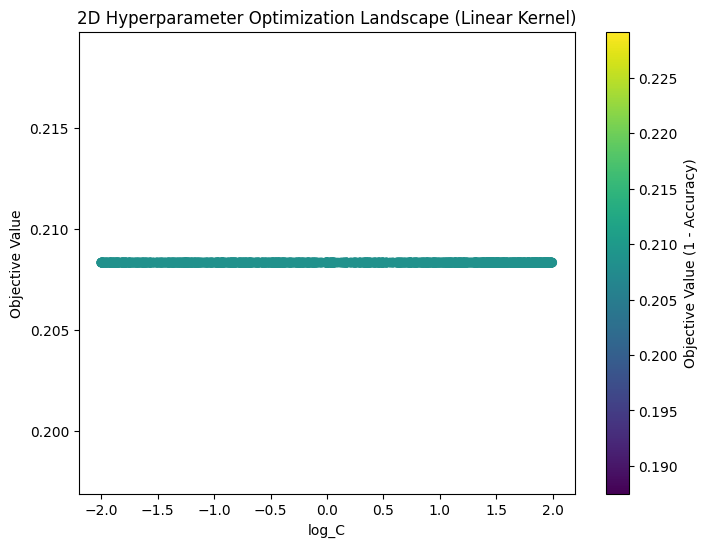

In [ ]:
# 2D Color Plot for Linear Kernel
def plot_2d_hyperparam_space():
    if "linear" in kernel_history:
        x_vals = [x[0][1] for x in kernel_history["linear"]]  # log_C
        y_vals = [x[1] for x in kernel_history["linear"]]  # Objective values
        
        plt.figure(figsize=(8, 6))
        plt.scatter(x_vals, y_vals, c=y_vals, cmap='viridis', marker='o')
        plt.colorbar(label='Objective Value (1 - Accuracy)')
        plt.xlabel('log_C')
        plt.ylabel('Objective Value')
        plt.title('2D Hyperparameter Optimization Landscape (Linear Kernel)')
        plt.show()

plot_2d_hyperparam_space()